# Modeling area feature distribution

In [1]:
%load_ext autoreload
%autoreload 2

In [29]:
# %load common_.py
from common import *

In [3]:
# export
from ehv import core, load as e_load, correlation
from matplotlib import cm
import matplotlib

In [70]:
import glob

In [76]:
df1 = e_load.load_raw_ideas_dir(
    Path("/data/weizmann/EhV/high_time_res"), 
    Path("/data/weizmann/EhV/weizmann-ehv-metadata/representations/ideas_features/"), 
    "ALL", 
    Path("/data/weizmann/EhV/weizmann-ehv-metadata/cell_populations/manual_gating/"),
    None, "Ctrl/*.cif")

In [78]:
samples = None
# samples = pandas.read_csv("data/selected_samples.csv")
df = e_load.load_raw_ideas_dir(
    Path("/data/weizmann/EhV/high_time_res"), 
    Path("/data/weizmann/EhV/weizmann-ehv-metadata/representations/ideas_features/"), 
    "ALL", 
    Path("/data/weizmann/EhV/weizmann-ehv-metadata/cell_populations/manual_gating/"),
    samples, "Low/*.cif")
df = pandas.concat([df1, df])
df = e_load.remove_unwanted_features(df)
df = e_load.tag_columns(df)
df = e_load.clean_column_names(df)

df = df[df["meta_label_coi"]]
df.shape

import re
reg = r"^meta_label_(.+)$"
label_vec = numpy.full((df.shape[0]), fill_value="unknown", dtype=object)
for col in df.filter(regex="(?i)meta_label_.*psba.*"):
    label_vec[df[col].values] = re.match(reg, col).groups(1)
    
df["meta_label"] = label_vec

In [61]:
def mode_center(df, col):
    df[col+"_mode_centered"] = df[col] - scipy.stats.mode(df[col]).mode[0]
    return df
df = df.groupby(["meta_timepoint", "meta_replicate"]).apply(lambda df: mode_center(df, "feat_area_m01"))

In [65]:
def cv_corrected(df, col):
    cv = df[col].std()/df[col].mean()
    df[col+"_cv_corrected"] = df[col]*cv
    return df
df = df.groupby(["meta_timepoint", "meta_replicate"]).apply(lambda df: cv_corrected(df, "feat_area_m01_mode_centered"))

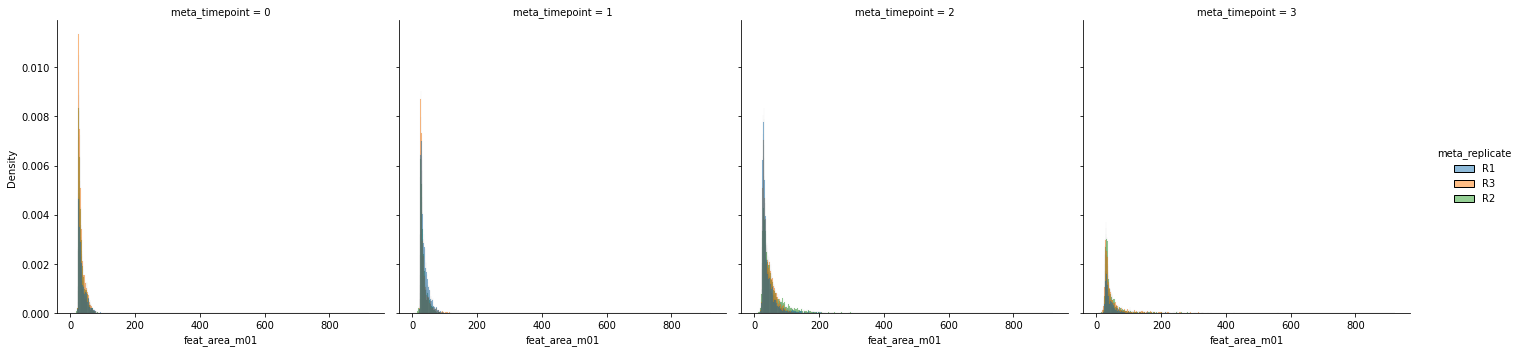

In [68]:
seaborn.displot(data=df[df["meta_timepoint"] < 4], x="feat_area_m01", col="meta_timepoint", col_wrap=4, hue="meta_replicate", stat="density")

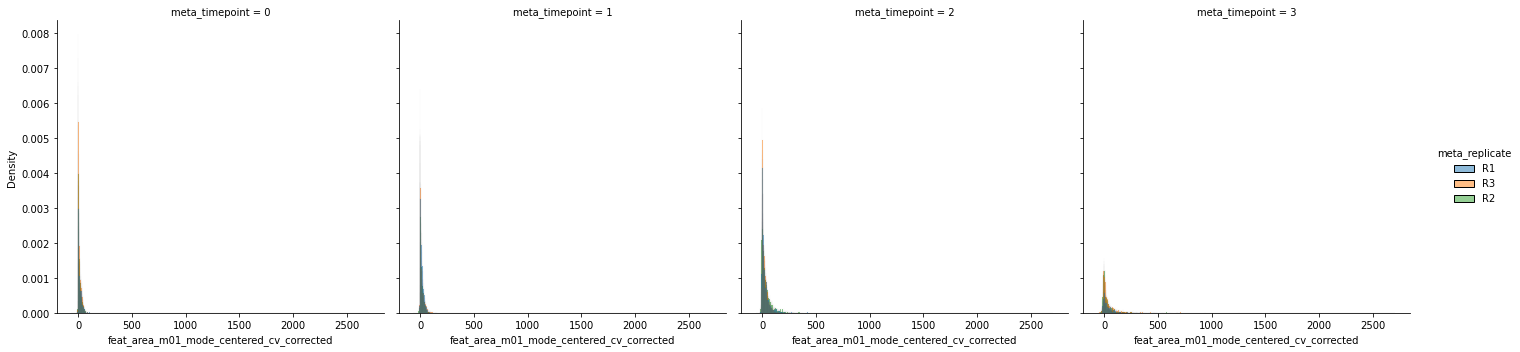

In [69]:
seaborn.displot(data=df[df["meta_timepoint"] < 4], x="feat_area_m01_mode_centered_cv_corrected", col="meta_timepoint", col_wrap=4, hue="meta_replicate", stat="density")